In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/workspaces/lol_api/data/gameMode/CLASSIC/overall/garecord.csv')
df

,matchId,gameMode,gameDuration,ME_assists,ME_baronKills,ME_bountyLevel,ME_champExperience,ME_champLevel,ME_championId,ME_championName,...,200UTIL_trueDamageDealtToChampions,200UTIL_trueDamageTaken,200UTIL_turretKills,200UTIL_turretsLost,200UTIL_unrealKills,200UTIL_visionScore,200UTIL_visionWardsBoughtInGame,200UTIL_wardsKilled,200UTIL_wardsPlaced,200UTIL_win
0,KR_5138516254,CLASSIC,1212.513,3,0,0,5223,9,99,Lux,...,230,159,0,5,0,32,4,4,15,False
1,KR_5143957063,CLASSIC,1381.126,1,0,0,9615,12,99,Lux,...,408,417,0,5,0,29,2,0,20,False
2,KR_5144040341,CLASSIC,1464.236,6,0,0,10356,13,6,Urgot,...,612,362,0,6,0,43,6,4,21,False
3,KR_5144859204,CLASSIC,1205.861,0,0,0,7355,11,99,Lux,...,649,180,0,8,0,21,3,3,11,False
4,KR_5156960508,CLASSIC,1788.017,4,0,0,12833,14,99,Lux,...,1096,519,0,9,0,71,9,7,32,False
5,KR_5176475024,CLASSIC,2046.992,11,0,3,13334,15,202,Jhin,...,67,1003,0,6,0,45,2,4,31,True
6,KR_5176633802,CLASSIC,1126.901,1,0,0,6632,10,99,Lux,...,570,110,0,5,0,9,1,0,6,False
7,KR_5180931801,CLASSIC,2064.663,5,0,2,10465,13,99,Lux,...,0,643,0,1,0,60,0,8,29,True
8,KR_5204695898,CLASSIC,1996.285,9,0,1,12266,14,99,Lux,...,676,130,0,9,0,48,4,6,20,False
9,KR_5204771853,CLASSIC,1999.491,2,0,1,9251,12,99,Lux,...,793,507,0,4,0,64,1,4,28,True


# ML for only my status

In [3]:
# Set A; only my status
dfA = df.iloc[:, 2:105]
dfA

,gameDuration,ME_assists,ME_baronKills,ME_bountyLevel,ME_champExperience,ME_champLevel,ME_championId,ME_championName,ME_championTransform,ME_consumablesPurchased,...,ME_trueDamageDealtToChampions,ME_trueDamageTaken,ME_turretKills,ME_turretsLost,ME_unrealKills,ME_visionScore,ME_visionWardsBoughtInGame,ME_wardsKilled,ME_wardsPlaced,ME_win
0,1212.513,3,0,0,5223,9,99,Lux,0,5,...,230,159,0,5,0,32,4,4,15,False
1,1381.126,1,0,0,9615,12,99,Lux,0,6,...,112,247,0,5,0,10,3,0,9,False
2,1464.236,6,0,0,10356,13,6,Urgot,0,4,...,4140,1601,0,6,0,22,3,5,6,False
3,1205.861,0,0,0,7355,11,99,Lux,0,4,...,104,450,0,8,0,5,2,1,5,False
4,1788.017,4,0,0,12833,14,99,Lux,0,8,...,151,652,0,9,0,33,4,2,14,False
5,2046.992,11,0,3,13334,15,202,Jhin,0,5,...,737,509,3,6,0,21,4,1,14,True
6,1126.901,1,0,0,6632,10,99,Lux,0,3,...,0,150,0,5,0,7,1,0,7,False
7,2064.663,5,0,2,10465,13,99,Lux,0,6,...,287,24,0,10,0,75,3,8,33,False
8,1996.285,9,0,1,12266,14,99,Lux,0,6,...,676,130,0,9,0,48,4,6,20,False
9,1999.491,2,0,1,9251,12,99,Lux,0,5,...,278,240,0,9,0,66,5,5,31,False


    'bountyLevel', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets',
    'deaths', 'doubleKills', 'dragonKills', 'goldEarned', 'inhibitorKills', 'inhibitorsLost',
    'killingSprees', 'kills', 'largestKillingSpree', 'largestMultiKill', 'neutralMinionsKilled',
    'totalHealsOnTeammates', 'turretKills', 'turretsLost', 'wardsKilled', 'win'

    --> usuable keys


In [4]:
# Normalization: X := X / time
dfA['champExperience'] = dfA['champExperience'] / dfA['gameDuration']
dfA['damageDealtToBuildings'] = dfA['damageDealtToBuildings'] / dfA['gameDuration']
dfA['damageDealtToObjectives'] = dfA['damageDealtToObjectives'] / dfA['gameDuration']
dfA['damageDealtToTurrets'] = dfA['damageDealtToTurrets'] / dfA['gameDuration']
dfA['goldEarned'] = dfA['goldEarned'] / dfA['gameDuration']
pd.concat([dfA, pd.get_dummies(dfA['win'])], axis=1)
# dfA.drop(['win'], axis=1, inplace=True)


,gameDuration,ME_assists,ME_baronKills,ME_bountyLevel,ME_champExperience,ME_champLevel,ME_championId,ME_championName,ME_championTransform,ME_consumablesPurchased,...,ME_turretKills,ME_turretsLost,ME_unrealKills,ME_visionScore,ME_visionWardsBoughtInGame,ME_wardsKilled,ME_wardsPlaced,ME_win,False,True
0,1212.513,3,0,0,4.307583,9,99,Lux,0,5,...,0,5,0,32,4,4,15,False,1,0
1,1381.126,1,0,0,6.961711,12,99,Lux,0,6,...,0,5,0,10,3,0,9,False,1,0
2,1464.236,6,0,0,7.072630,13,6,Urgot,0,4,...,0,6,0,22,3,5,6,False,1,0
3,1205.861,0,0,0,6.099376,11,99,Lux,0,4,...,0,8,0,5,2,1,5,False,1,0
4,1788.017,4,0,0,7.177225,14,99,Lux,0,8,...,0,9,0,33,4,2,14,False,1,0
5,2046.992,11,0,3,6.513948,15,202,Jhin,0,5,...,3,6,0,21,4,1,14,True,0,1
6,1126.901,1,0,0,5.885166,10,99,Lux,0,3,...,0,5,0,7,1,0,7,False,1,0
7,2064.663,5,0,2,5.068624,13,99,Lux,0,6,...,0,10,0,75,3,8,33,False,1,0
8,1996.285,9,0,1,6.144413,14,99,Lux,0,6,...,0,9,0,48,4,6,20,False,1,0
9,1999.491,2,0,1,4.626677,12,99,Lux,0,5,...,0,9,0,66,5,5,31,False,1,0


In [5]:
dfA

,gameDuration,ME_assists,ME_baronKills,ME_bountyLevel,ME_champExperience,ME_champLevel,ME_championId,ME_championName,ME_championTransform,ME_consumablesPurchased,...,ME_trueDamageDealtToChampions,ME_trueDamageTaken,ME_turretKills,ME_turretsLost,ME_unrealKills,ME_visionScore,ME_visionWardsBoughtInGame,ME_wardsKilled,ME_wardsPlaced,ME_win
0,1212.513,3,0,0,4.307583,9,99,Lux,0,5,...,230,159,0,5,0,32,4,4,15,False
1,1381.126,1,0,0,6.961711,12,99,Lux,0,6,...,112,247,0,5,0,10,3,0,9,False
2,1464.236,6,0,0,7.072630,13,6,Urgot,0,4,...,4140,1601,0,6,0,22,3,5,6,False
3,1205.861,0,0,0,6.099376,11,99,Lux,0,4,...,104,450,0,8,0,5,2,1,5,False
4,1788.017,4,0,0,7.177225,14,99,Lux,0,8,...,151,652,0,9,0,33,4,2,14,False
5,2046.992,11,0,3,6.513948,15,202,Jhin,0,5,...,737,509,3,6,0,21,4,1,14,True
6,1126.901,1,0,0,5.885166,10,99,Lux,0,3,...,0,150,0,5,0,7,1,0,7,False
7,2064.663,5,0,2,5.068624,13,99,Lux,0,6,...,287,24,0,10,0,75,3,8,33,False
8,1996.285,9,0,1,6.144413,14,99,Lux,0,6,...,676,130,0,9,0,48,4,6,20,False
9,1999.491,2,0,1,4.626677,12,99,Lux,0,5,...,278,240,0,9,0,66,5,5,31,False


In [6]:
dfA.corr(method='pearson')

,gameDuration,ME_assists,ME_baronKills,ME_bountyLevel,ME_champExperience,ME_champLevel,ME_championId,ME_championTransform,ME_consumablesPurchased,ME_damageDealtToBuildings,...,ME_trueDamageDealtToChampions,ME_trueDamageTaken,ME_turretKills,ME_turretsLost,ME_unrealKills,ME_visionScore,ME_visionWardsBoughtInGame,ME_wardsKilled,ME_wardsPlaced,ME_win
gameDuration,1.000000,0.483758,NaN,0.258895,0.031156,0.804254,0.134079,NaN,0.279729,-0.086723,...,0.090260,-0.068639,0.213884,0.637684,NaN,0.731913,0.420809,0.574372,0.750778,-0.089144
ME_assists,0.483758,1.000000,NaN,0.509171,0.396017,0.633174,0.445818,NaN,-0.251495,0.636393,...,0.219418,0.313029,0.536555,-0.014968,NaN,0.244886,0.055776,0.292901,0.267007,0.487417
ME_baronKills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ME_bountyLevel,0.258895,0.509171,NaN,1.000000,0.398374,0.425220,0.404948,NaN,-0.048513,0.608263,...,-0.120445,-0.240770,0.345566,-0.367673,NaN,0.228821,0.161067,0.106998,0.297037,0.736502
ME_champExperience,0.031156,0.396017,NaN,0.398374,1.000000,0.600472,0.055843,NaN,-0.013765,0.553362,...,0.249765,0.331219,0.259407,-0.037898,NaN,-0.404024,-0.295594,-0.233267,-0.369909,0.250891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ME_visionScore,0.731913,0.244886,NaN,0.228821,-0.404024,0.319561,-0.044563,NaN,0.201758,-0.183847,...,-0.010283,-0.288665,-0.212851,0.401083,NaN,1.000000,0.433161,0.769825,0.970816,-0.156742
ME_visionWardsBoughtInGame,0.420809,0.055776,NaN,0.161067,-0.295594,0.123325,0.186293,NaN,0.629243,0.007325,...,-0.033645,-0.156254,0.206872,0.017660,NaN,0.433161,1.000000,0.358753,0.361666,0.178005
ME_wardsKilled,0.574372,0.292901,NaN,0.106998,-0.233267,0.293568,-0.126074,NaN,0.232082,-0.066910,...,0.312695,-0.084875,-0.085643,0.486129,NaN,0.769825,0.358753,1.000000,0.659694,-0.277350
ME_wardsPlaced,0.750778,0.267007,NaN,0.297037,-0.369909,0.359358,0.074168,NaN,0.128690,-0.161966,...,-0.132799,-0.377747,-0.140405,0.398208,NaN,0.970816,0.361666,0.659694,1.000000,-0.111148


In [7]:
strList = ['championName', 'individualPosition', 'lane', 'puuid', 'riotIdName',
            'riotIdTagline', 'role', 'summonerId', 'summonerName', 'teamPosition',
            'perks', 'baronKills', 'championTransform', 'unrealKills',
            'firstTowerAssist', 'firstTowerKill', 'nexusKills', 'objectivesStolen',
            'objectivesStolenAssists', 'pentaKills', 'profileIcon', 'quadraKills',
            'sightWardsBoughtInGame', 'summoner2Id', 'gameEndedInEarlySurrender', 'teamEarlySurrendered'
            ]
for i in range(len(strList)):
    strText = f'{strList[i]}'
    dfA = dfA.drop(strText, axis=1)
dfA

,gameDuration,ME_assists,ME_bountyLevel,ME_champExperience,ME_champLevel,ME_championId,ME_consumablesPurchased,ME_damageDealtToBuildings,ME_damageDealtToObjectives,ME_damageDealtToTurrets,...,ME_trueDamageDealt,ME_trueDamageDealtToChampions,ME_trueDamageTaken,ME_turretKills,ME_turretsLost,ME_visionScore,ME_visionWardsBoughtInGame,ME_wardsKilled,ME_wardsPlaced,ME_win
0,1212.513,3,0,4.307583,9,99,5,0.000000,0.000000,0.000000,...,230,230,159,0,5,32,4,4,15,False
1,1381.126,1,0,6.961711,12,99,6,0.273690,0.585754,0.273690,...,4522,112,247,0,5,10,3,0,9,False
2,1464.236,6,0,7.072630,13,6,4,1.067451,5.616581,1.067451,...,12831,4140,1601,0,6,22,3,5,6,False
3,1205.861,0,0,6.099376,11,99,4,0.000000,0.000000,0.000000,...,104,104,450,0,8,5,2,1,5,False
4,1788.017,4,0,7.177225,14,99,8,1.002228,1.640924,1.002228,...,151,151,652,0,9,33,4,2,14,False
5,2046.992,11,3,6.513948,15,202,5,2.320478,5.559377,2.320478,...,1623,737,509,3,6,21,4,1,14,True
6,1126.901,1,0,5.885166,10,99,3,0.000000,0.000000,0.000000,...,0,0,150,0,5,7,1,0,7,False
7,2064.663,5,2,5.068624,13,99,6,0.000000,0.448015,0.000000,...,287,287,24,0,10,75,3,8,33,False
8,1996.285,9,1,6.144413,14,99,6,0.247961,0.247961,0.247961,...,676,676,130,0,9,48,4,6,20,False
9,1999.491,2,1,4.626677,12,99,5,0.059015,1.167797,0.059015,...,292,278,240,0,9,66,5,5,31,False


In [8]:
dfA.dropna(inplace=True)

In [9]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 77 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gameDuration                       16 non-null     float64
 1   ME_assists                         16 non-null     int64  
 2   ME_bountyLevel                     16 non-null     int64  
 3   ME_champExperience                 16 non-null     float64
 4   ME_champLevel                      16 non-null     int64  
 5   ME_championId                      16 non-null     int64  
 6   ME_consumablesPurchased            16 non-null     int64  
 7   ME_damageDealtToBuildings          16 non-null     float64
 8   ME_damageDealtToObjectives         16 non-null     float64
 9   ME_damageDealtToTurrets            16 non-null     float64
 10  ME_damageSelfMitigated             16 non-null     int64  
 11  ME_deaths                          16 non-null     int64  
 

<AxesSubplot:title={'center':'Correlation of features'}>

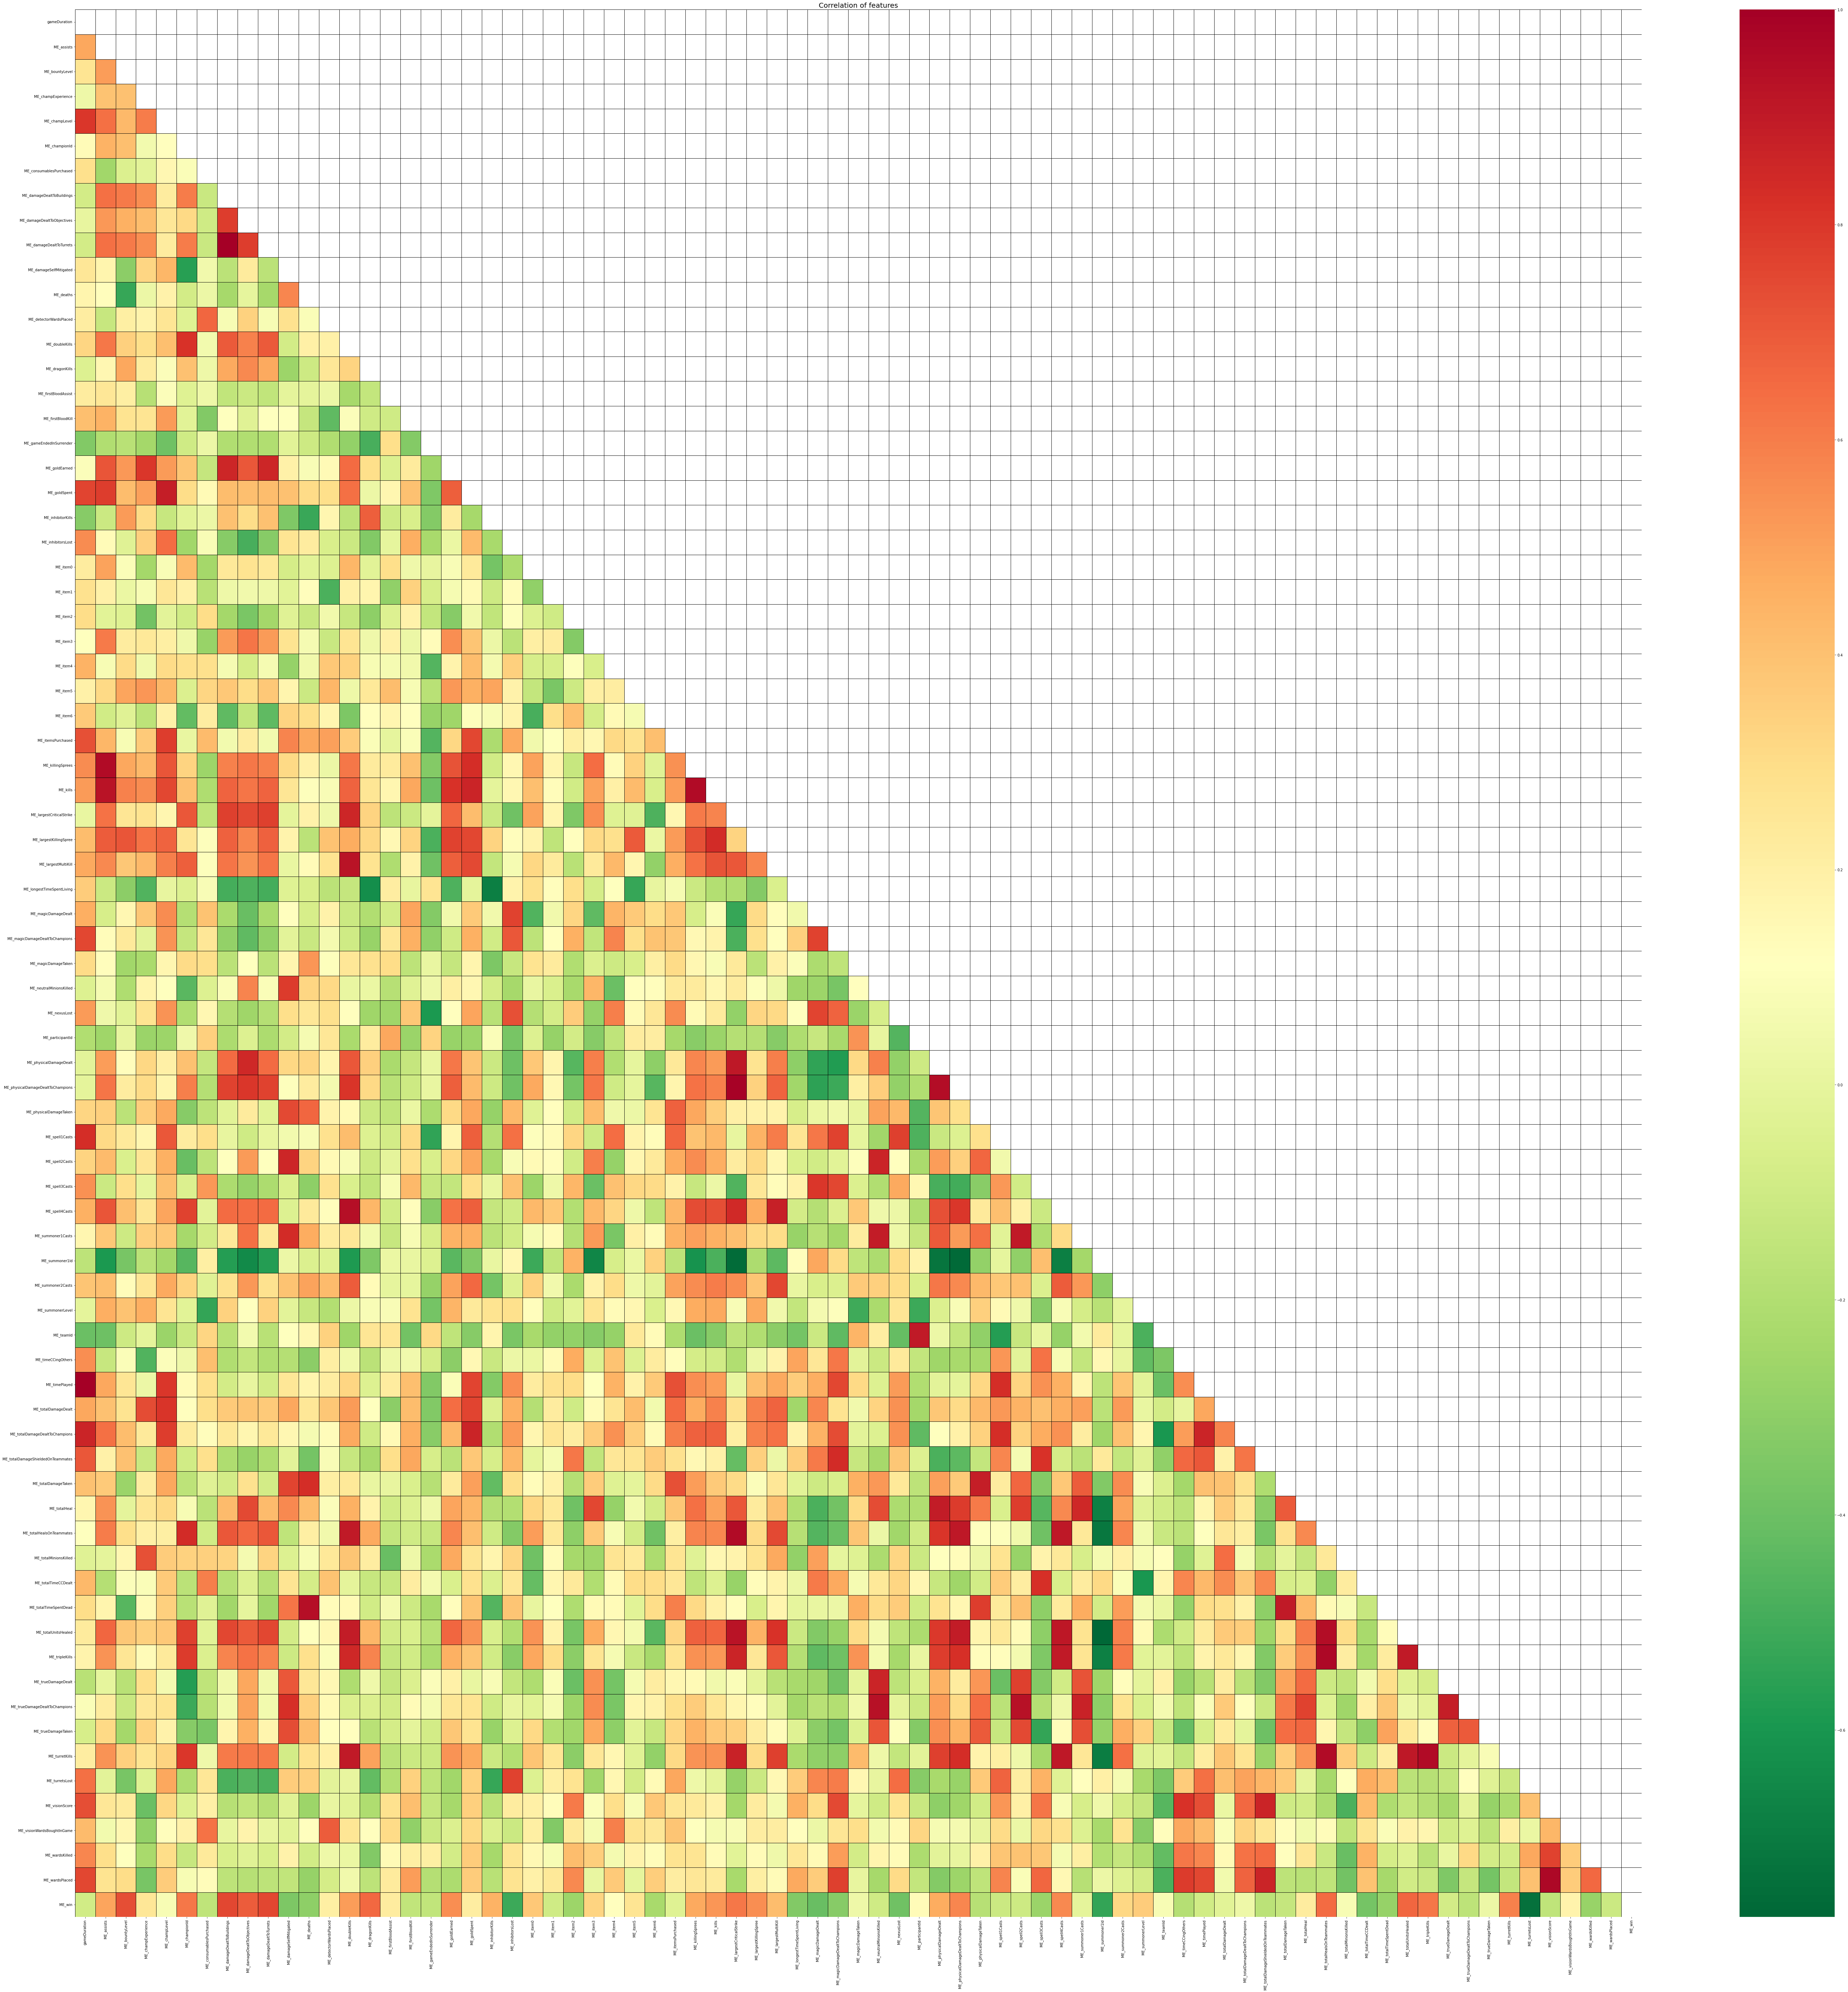

In [10]:
plt.figure(figsize=(100,100))
plt.title("Correlation of features", fontsize=20)
mask = np.zeros_like(dfA.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dfA.corr(), cmap='RdYlGn_r', mask=mask, linecolor='black', linewidth=1)

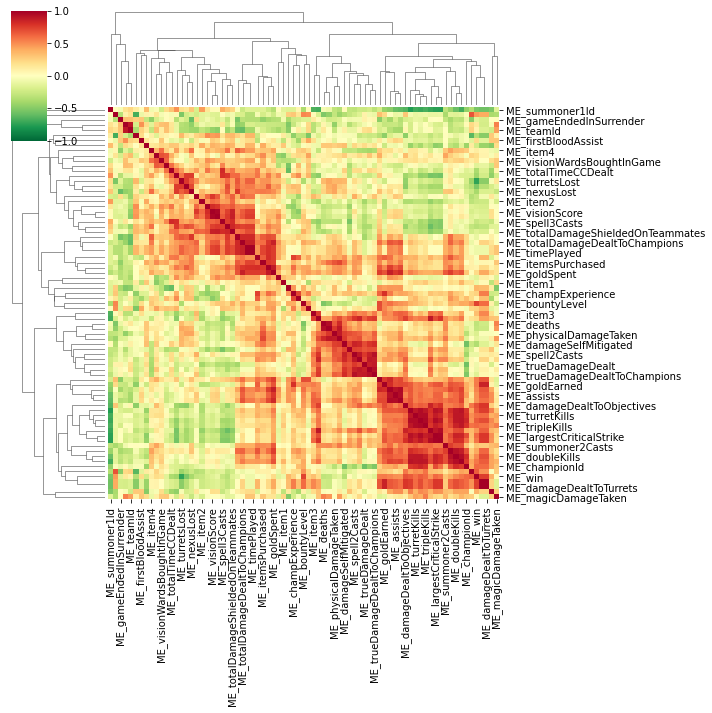

In [11]:
corr = dfA.corr()
sns.clustermap(corr,
                cmap='RdYlGn_r',
                vmin=-1, vmax=1,
                )

In [12]:
# 102 keys are SUPER heavy... Shrink the dimension!
usableKeys = [
    'bountyLevel', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets',
    'deaths', 'doubleKills', 'dragonKills', 'goldEarned', 'inhibitorKills', 'inhibitorsLost',
    'killingSprees', 'kills', 'largestKillingSpree', 'largestMultiKill', 'neutralMinionsKilled',
    'totalHealsOnTeammates', 'turretKills', 'turretsLost', 'wardsKilled', 'win'
]

usableKeys = ['gameDuration'] + [ f'{usableKeys[i]}' for i in range(len(usableKeys)) ]

new_dfA = dfA.loc[:, usableKeys]
new_dfA

,gameDuration,ME_bountyLevel,ME_damageDealtToBuildings,ME_damageDealtToObjectives,ME_damageDealtToTurrets,ME_deaths,ME_doubleKills,ME_dragonKills,ME_goldEarned,ME_inhibitorKills,...,ME_killingSprees,ME_kills,ME_largestKillingSpree,ME_largestMultiKill,ME_neutralMinionsKilled,ME_totalHealsOnTeammates,ME_turretKills,ME_turretsLost,ME_wardsKilled,ME_win
0,1212.513,0,0.000000,0.000000,0.000000,5,0,0,3.963669,0,...,0,0,0,0,4,0,0,5,4,False
1,1381.126,0,0.273690,0.585754,0.273690,4,0,0,5.452797,0,...,0,1,0,1,0,0,0,5,0,False
2,1464.236,0,1.067451,5.616581,1.067451,6,0,0,6.705203,0,...,2,7,3,1,96,0,0,6,5,False
3,1205.861,0,0.000000,0.000000,0.000000,2,0,0,4.377785,0,...,0,1,0,1,4,0,0,8,1,False
4,1788.017,0,1.002228,1.640924,1.002228,5,1,0,6.386405,0,...,1,7,6,2,20,0,0,9,2,False
5,2046.992,3,2.320478,5.559377,2.320478,7,3,1,6.928215,0,...,3,12,4,3,20,724,3,6,1,True
6,1126.901,0,0.000000,0.000000,0.000000,5,0,0,5.339422,0,...,0,2,0,1,0,0,0,5,0,False
7,2064.663,2,0.000000,0.448015,0.000000,1,0,0,3.876662,0,...,1,3,2,1,0,0,0,10,8,False
8,1996.285,1,0.247961,0.247961,0.247961,6,0,0,5.927009,0,...,2,7,3,1,0,0,0,9,6,False
9,1999.491,1,0.059015,1.167797,0.059015,4,1,0,4.954261,0,...,1,4,2,2,6,0,0,9,5,False


In [13]:
# onehot = pd.get_dummies(new_dfA['win'])
# new_dfA = pd.concat([new_dfA, onehot], axis=1)

# new_dfA

In [14]:
# new_dfA.drop(['win'], axis=1, inplace=True)
# new_dfA

<AxesSubplot:title={'center':'Correlation of features'}>

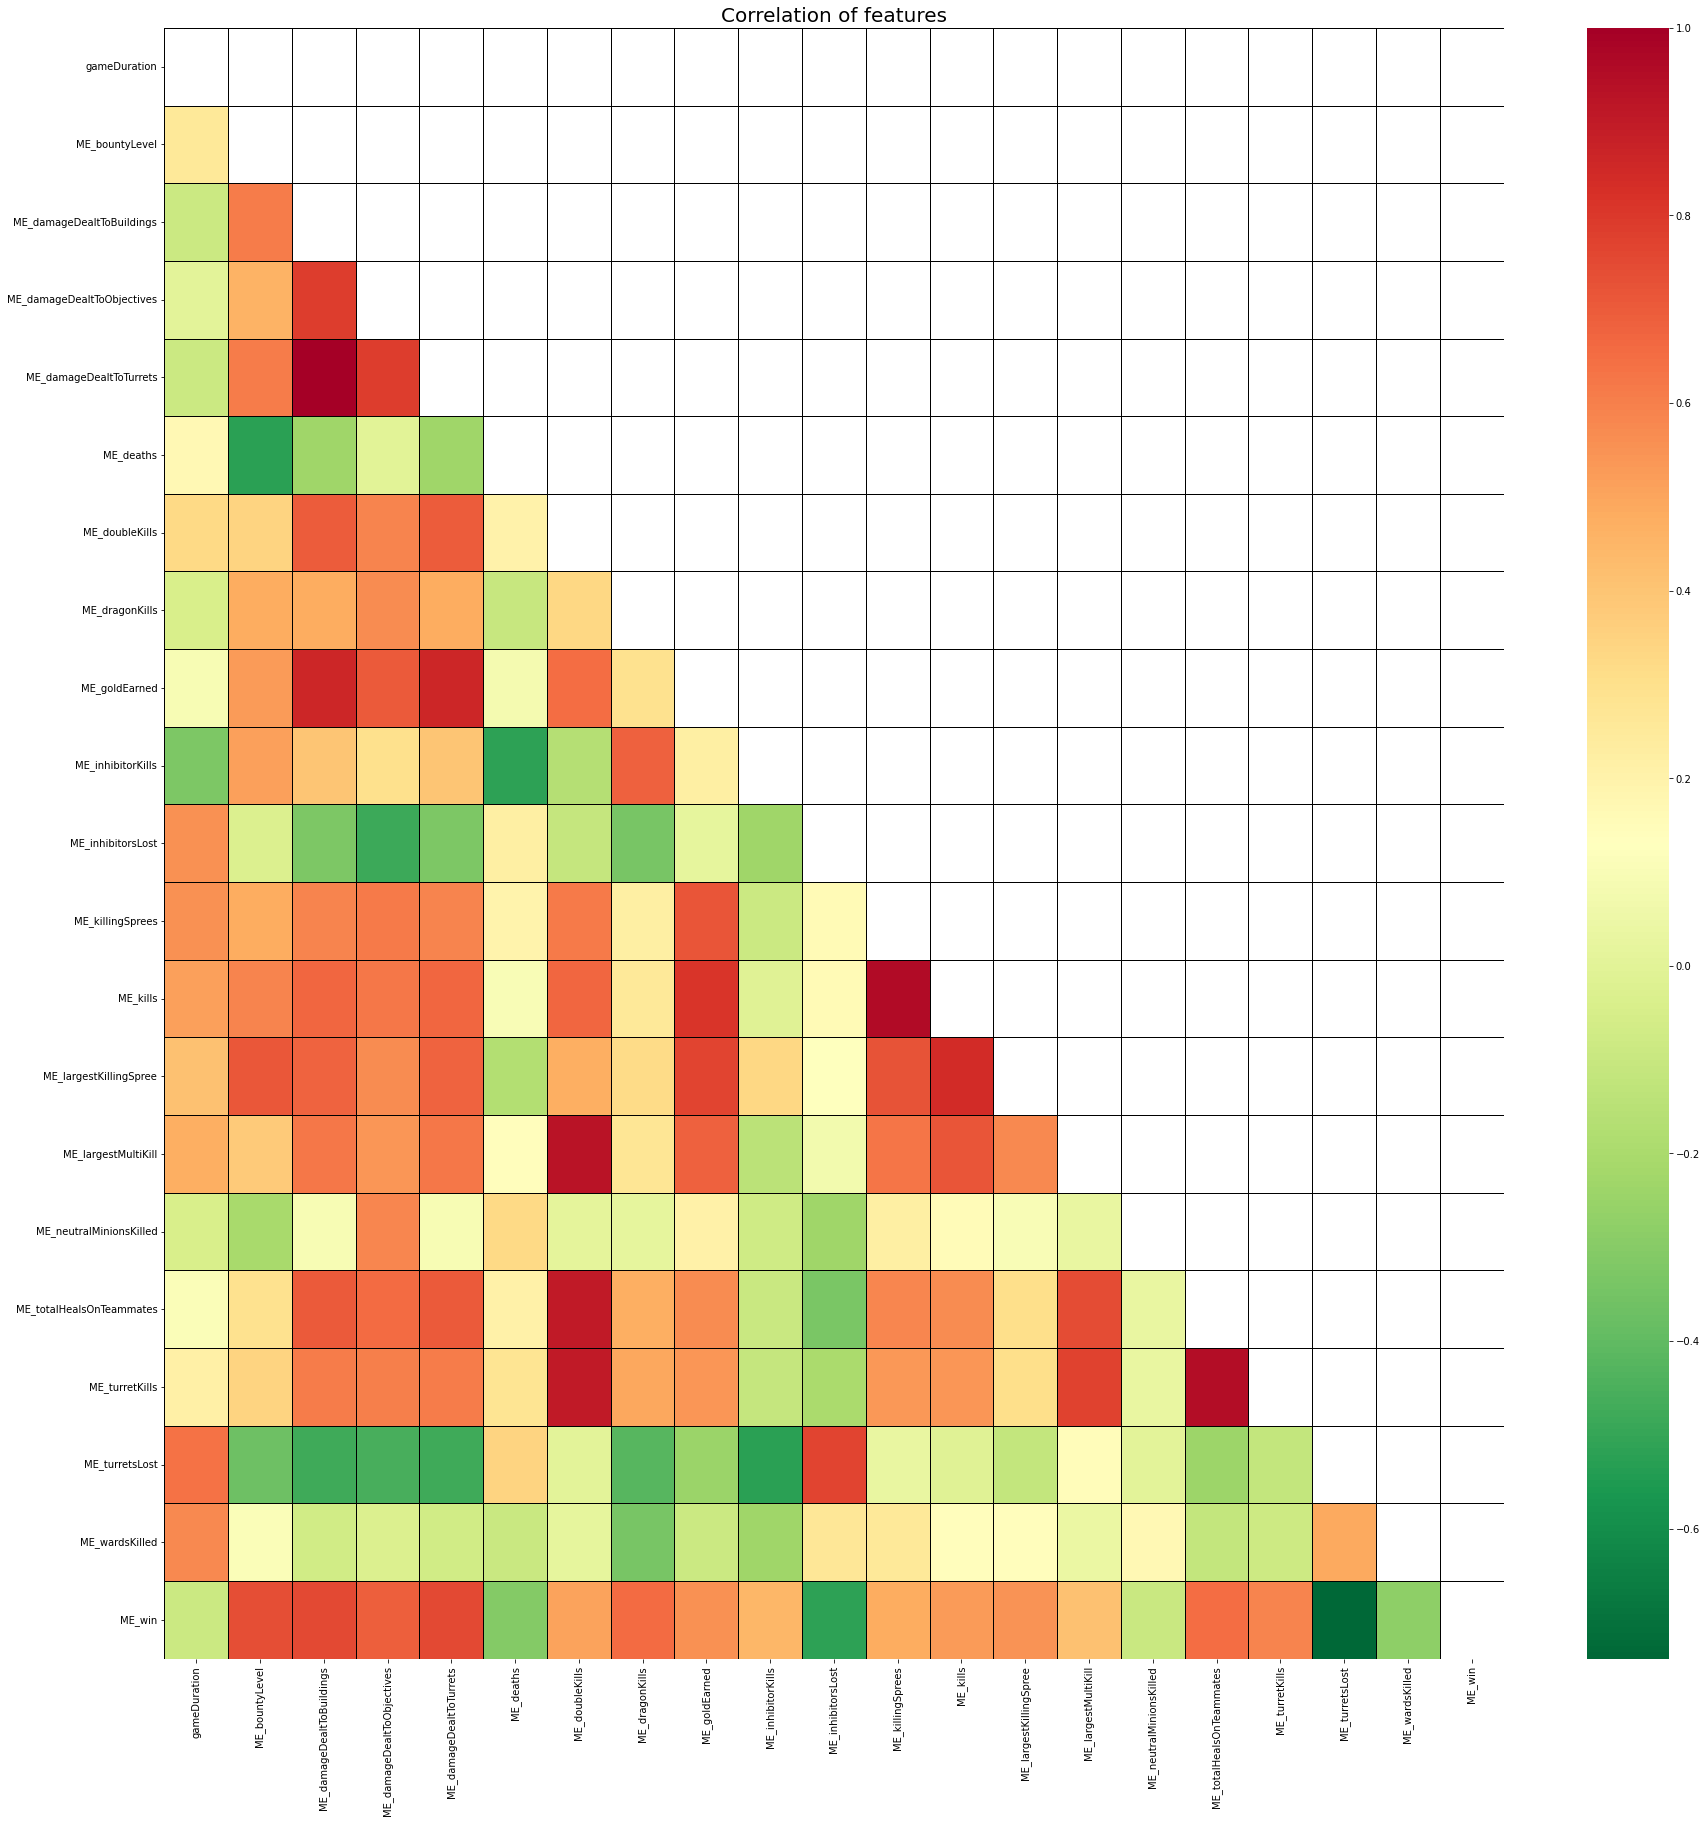

In [15]:
plt.figure(figsize=(30,30))
plt.title("Correlation of features", fontsize=20)
mask = np.zeros_like(new_dfA.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(new_dfA.corr(), cmap='RdYlGn_r', mask=mask, linecolor='black', linewidth=1)

In [16]:
new_dfA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameDuration                16 non-null     float64
 1   ME_bountyLevel              16 non-null     int64  
 2   ME_damageDealtToBuildings   16 non-null     float64
 3   ME_damageDealtToObjectives  16 non-null     float64
 4   ME_damageDealtToTurrets     16 non-null     float64
 5   ME_deaths                   16 non-null     int64  
 6   ME_doubleKills              16 non-null     int64  
 7   ME_dragonKills              16 non-null     int64  
 8   ME_goldEarned               16 non-null     float64
 9   ME_inhibitorKills           16 non-null     int64  
 10  ME_inhibitorsLost           16 non-null     int64  
 11  ME_killingSprees            16 non-null     int64  
 12  ME_kills                    16 non-null     int64  
 13  ME_largestKillingSpree      16 non-nu

In [17]:
import tensorflow as tf
# tf.random.set_seed(777)

2021-08-21 11:08:06.674118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-21 11:08:06.674195: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid'),
])

adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


2021-08-21 11:08:08.680565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-21 11:08:08.680641: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-21 11:08:08.680670: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (22d09d13c127): /proc/driver/nvidia/version does not exist
2021-08-21 11:08:08.680912: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/vscode/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` 

In [19]:
history = model.fit(new_dfA.iloc[:, 2:-1], new_dfA.iloc[:,[-1]], epochs=100)
# 17epoch == acc 1.0000

2021-08-21 11:08:08.838678: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1/1 [==============================] - 1s 525ms/step - loss: 12.3189 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1656 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0196 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 8.8906 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 7.7475 - accuracy: 0.3125
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 6.6224 - accuracy: 0.3125
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 5.5041 - accuracy: 0.3750
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 4.4179 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 3.3571 - accuracy: 0.5625
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 2.3064 - accuracy: 0.5625
Epoch 11/100
1/1 [======

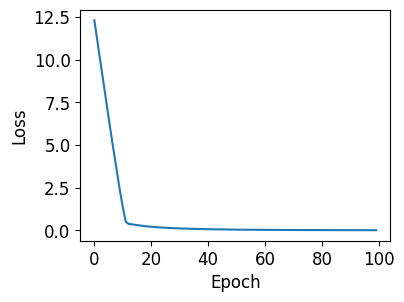

In [20]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

binary crossentropy 다루는법을 좀 더 알아보자.